Student ID
StudentID: A unique identifier assigned to each student (1001 to 3392).
Demographic Details
Age: The age of the students ranges from 15 to 18 years.
Gender: Gender of the students, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher
Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
Absences: Number of absences during the school year, ranging from 0 to 30.
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High
Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

In [1]:

# Import Libararies

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df=pd.read_csv("Student_performance_data _.csv")

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<Axes: >

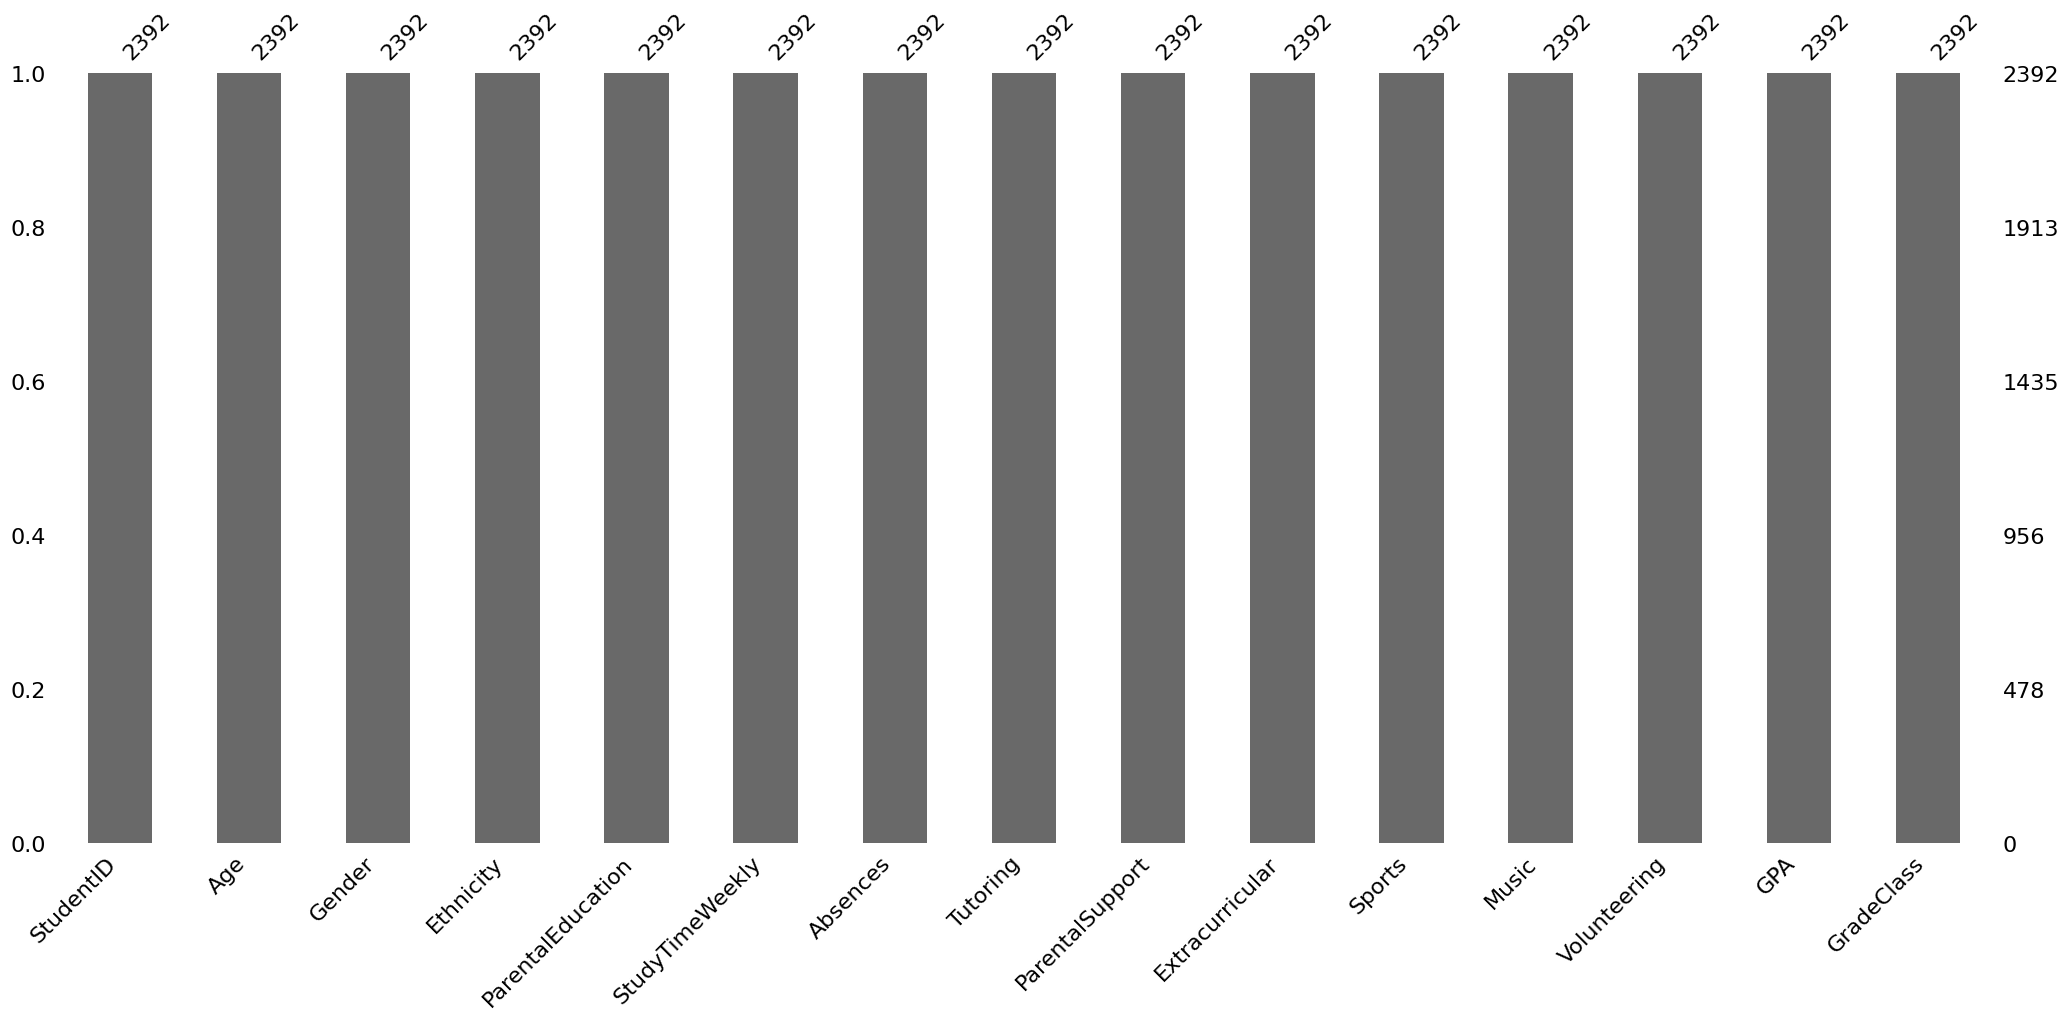

In [8]:
# To Check Missing Numbers

msno.bar(df)

In [9]:
# Check for Duplicates
df.duplicated().sum() 

np.int64(0)

Observation 1
1. there are 2392 Students record
2. There are no missing and no duplicate values.
so data is almost clean

In [10]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [14]:
# df['Age'].value_counts()
# df['Age'].unique()
df['Age'].nunique()

4

In [15]:
mycols = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
        'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass']

for col  in mycols:
  total_unique_Values = df[col].nunique()
  print(f'Total unique values for {col} : {total_unique_Values}')
  unique_count = df[col].value_counts()
  print(unique_count, '\n')

Total unique values for Age : 4
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64 

Total unique values for Gender : 2
Gender
1    1222
0    1170
Name: count, dtype: int64 

Total unique values for Ethnicity : 4
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64 

Total unique values for ParentalEducation : 5
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64 

Total unique values for Tutoring : 2
Tutoring
0    1671
1     721
Name: count, dtype: int64 

Total unique values for ParentalSupport : 5
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64 

Total unique values for Extracurricular : 2
Extracurricular
0    1475
1     917
Name: count, dtype: int64 

Total unique values for Sports : 2
Sports
0    1666
1     726
Name: count, dtype: int64 

Total unique values for Music : 2
Music
0    1921
1     471
Name: count, dtype: int64 

Total unique values for Volunteering : 2

# Exploratory Data Analysis(EDA)

# Univariate Analysis

In [16]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [17]:
df = df.drop(['StudentID'], axis = 1)

In [18]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [19]:
cat_col = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
        'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass']

In [20]:
# [col for col in df.columns if df[col].nunique() <= 8 and df[col].dtype in ['int64', 'float64']]
num_col = [col for col in df.columns if col not in cat_col and df[col].dtype in ['int64', 'float64']]


print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

Categorical columns:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
Numerical columns:  ['StudyTimeWeekly', 'Absences', 'GPA']


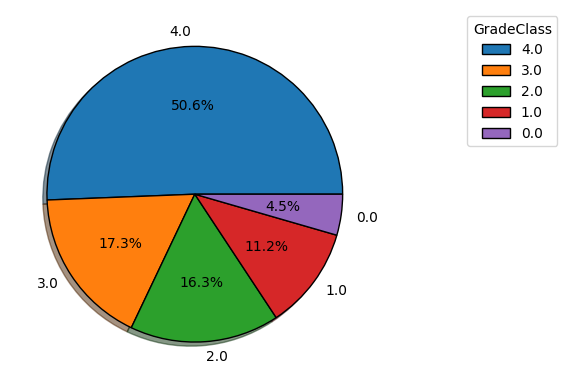

In [21]:
gradeCount = df['GradeClass'].value_counts()

grades = gradeCount.index.tolist()
counts = gradeCount.values.tolist()
total_students = sum(counts)

percentage_count = [(count/total_students) * 100 for count in counts ]

plt.pie(percentage_count, labels = grades,autopct='%1.1f%%',shadow=True, wedgeprops={'edgecolor':'black'})
plt.legend(grades, title='GradeClass', bbox_to_anchor = (1,0,0.5,1))
plt.show()

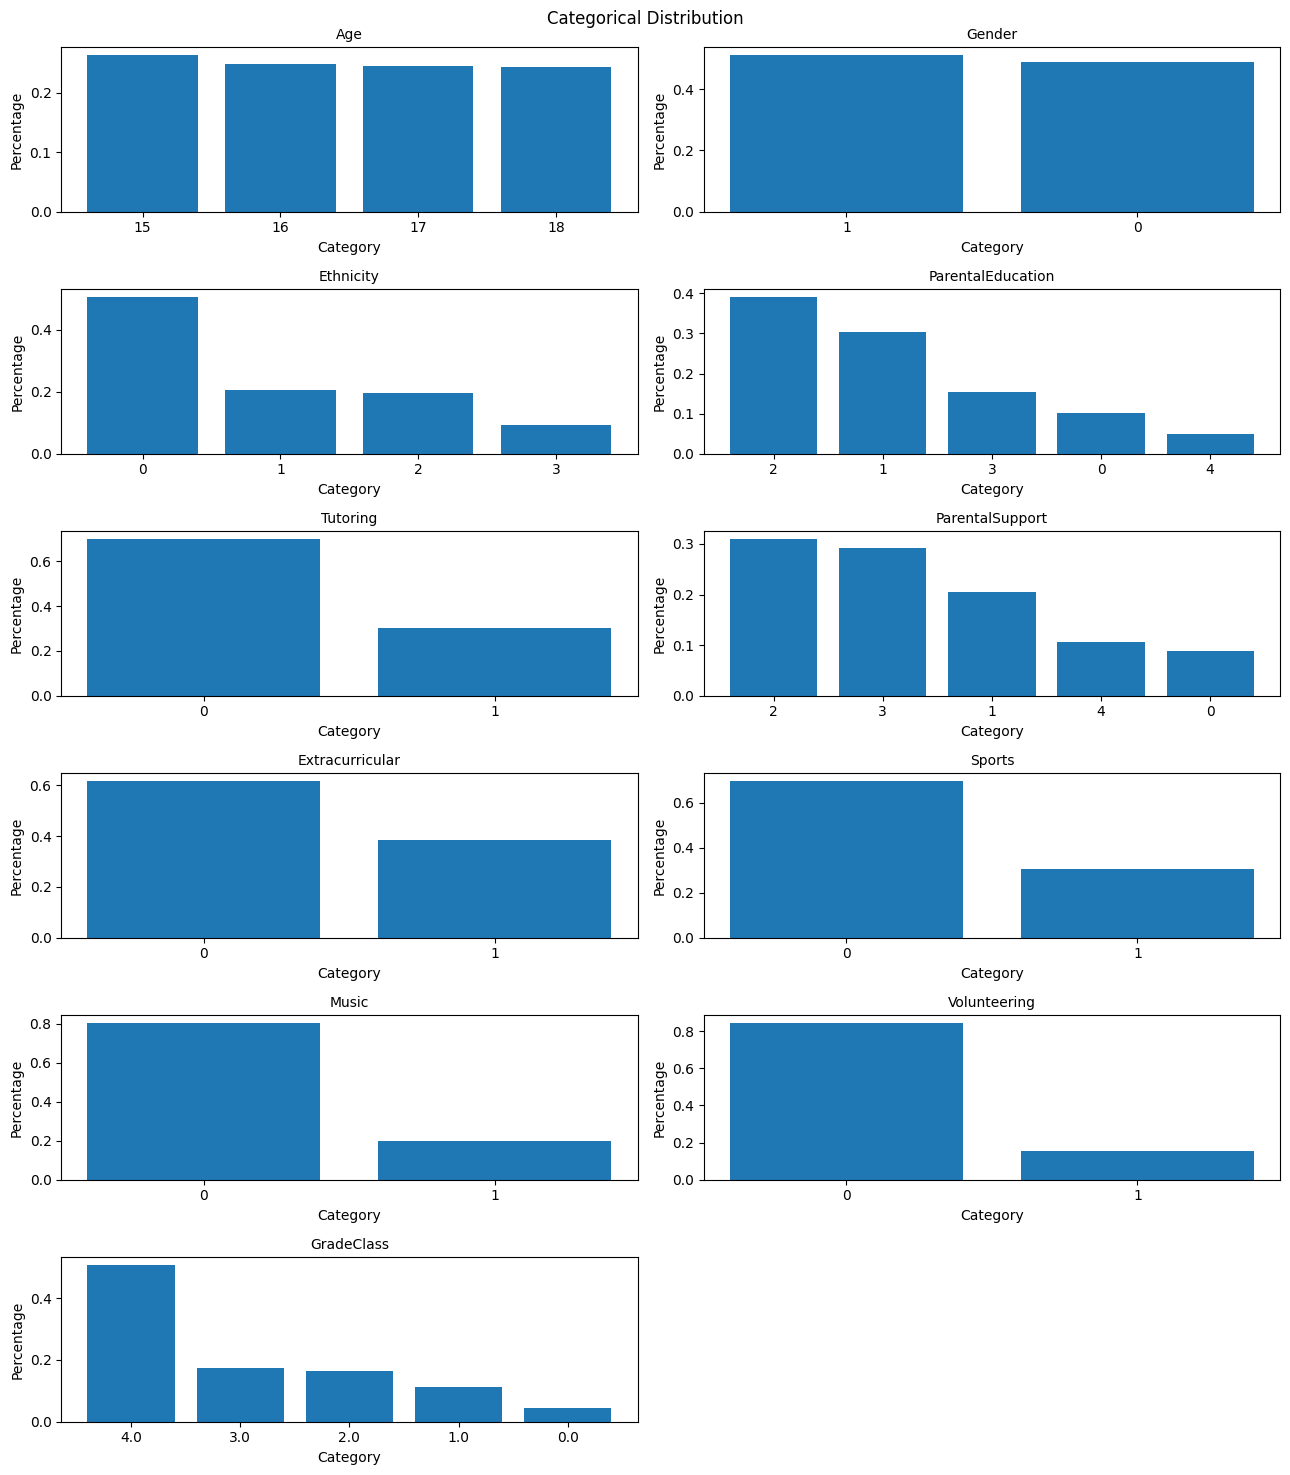

In [22]:
fig, axs = plt.subplots(len(cat_col)//2 + len(cat_col)%2, 2, figsize=(13, 15))
axs = axs.flatten()

for i, col in enumerate(cat_col):
  vc= df[col].value_counts(normalize=True)
  axs[i].bar(vc.index.astype(str), vc)
  axs[i].set_title(col, fontsize=10)
  axs[i].set_xlabel('Category')
  axs[i].set_ylabel('Percentage')

for j in range(i+1, len(axs)):
  fig.delaxes(axs[j])


plt.suptitle('Categorical Distribution')
plt.tight_layout()
plt.show()

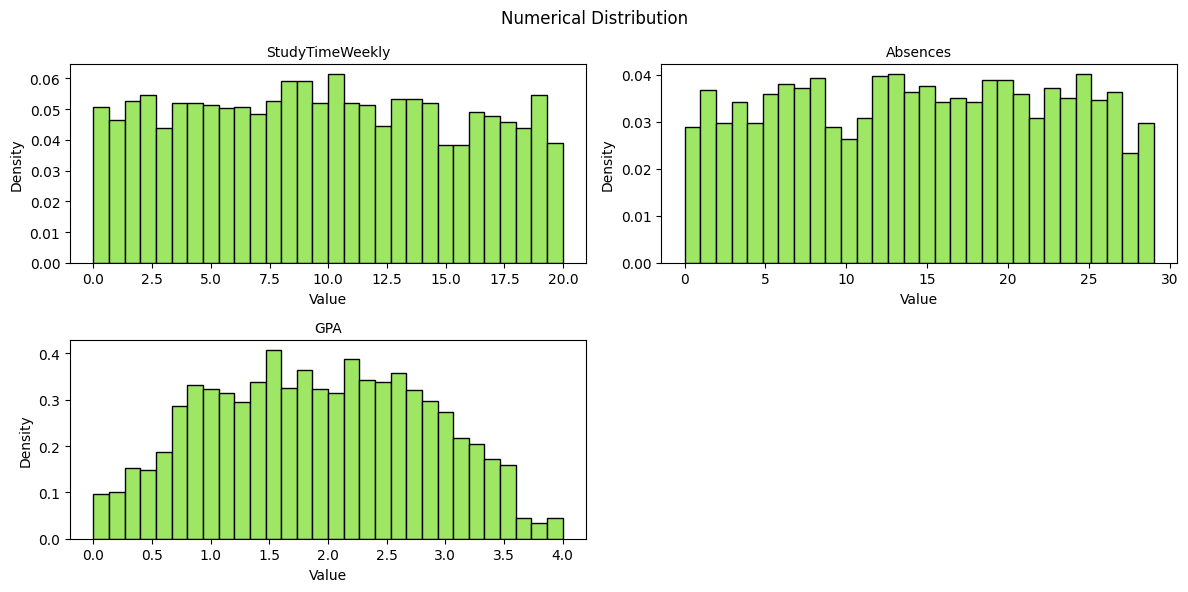

In [23]:
fig, axs = plt.subplots(len(num_col)//2 + len(num_col)%2, 2, figsize=(12, 6))
axs = axs.flatten()

for i, col in enumerate(num_col):
  axs[i].hist(df[col], bins=30, edgecolor = 'black', color = '#9ee765', density=True)
  axs[i].set_title(col, fontsize=10)
  axs[i].set_xlabel('Value')
  axs[i].set_ylabel('Density')

for j in range(i+1, len(axs)):
  fig.delaxes(axs[j])


plt.suptitle('Numerical Distribution')
plt.tight_layout()
plt.show()

# Bivariate Analysis

# Distribution of Grade based on Tutoring

In [24]:
crosstab_grade = pd.crosstab(df['Tutoring'], df['GradeClass'])
crosstab_gradePercent = crosstab_grade.div(crosstab_grade.sum(axis=1), axis=0)*100
print(crosstab_grade)
print(crosstab_gradePercent)

GradeClass  0.0  1.0  2.0  3.0  4.0
Tutoring                           
0            55  160  273  301  882
1            52  109  118  113  329
GradeClass       0.0        1.0        2.0        3.0        4.0
Tutoring                                                        
0           3.291442   9.575105  16.337522  18.013166  52.782765
1           7.212205  15.117892  16.366158  15.672677  45.631068


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

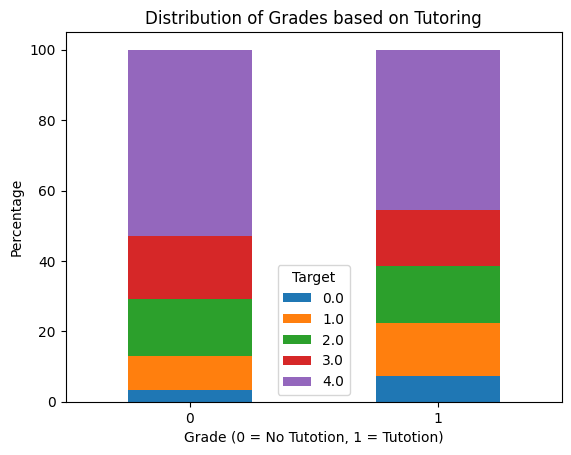

In [25]:
crosstab_gradePercent.plot(kind='bar', stacked = True)
plt.xlabel('Grade (0 = No Tutotion, 1 = Tutotion)')
plt.ylabel('Percentage')
plt.title("Distribution of Grades based on Tutoring")
plt.legend(title = "Target")
plt.xticks(rotation=0)

# Distribution of Gender based on Tutoring

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

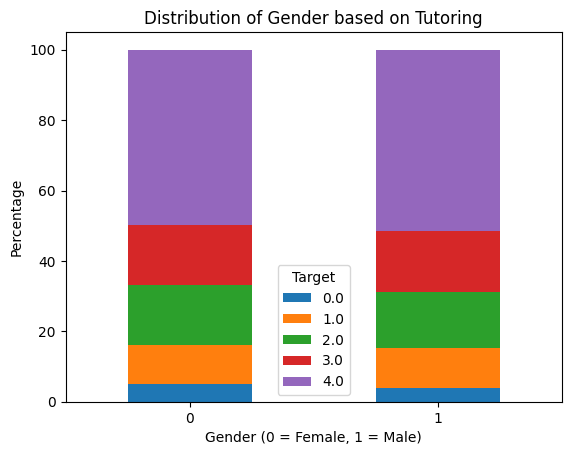

In [26]:
crosstab_grade = pd.crosstab(df['Gender'], df['GradeClass'])
crosstab_gradePercent = crosstab_grade.div(crosstab_grade.sum(axis=1), axis=0)*100

crosstab_gradePercent.plot(kind='bar', stacked = True)
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Percentage')
plt.title("Distribution of Gender based on Tutoring")
plt.legend(title = "Target")
plt.xticks(rotation=0)

# Correlation

<Axes: >

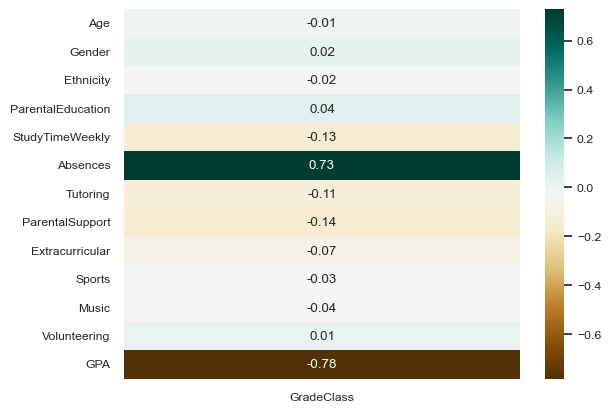

In [27]:
corrMatrix = df.corr()
target_corrMatrix = corrMatrix['GradeClass'].drop('GradeClass')

sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette('PuBuGn_d')
sns.heatmap(target_corrMatrix.to_frame(), cmap = 'BrBG', annot=True, fmt='.2f')

# Data Preprocessing

In [29]:
data = df.copy()
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b07f4c3c20>,
 'caps': [<matplotlib.lines.Line2D at 0x1b07f4f0260>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b07e2cb050>],
 'medians': [<matplotlib.lines.Line2D at 0x1b07f4f0650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b07f4f08c0>],
 'means': []}

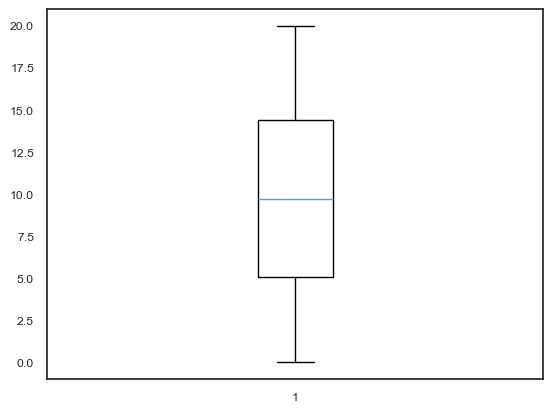

In [30]:
plt.boxplot(data['StudyTimeWeekly'])

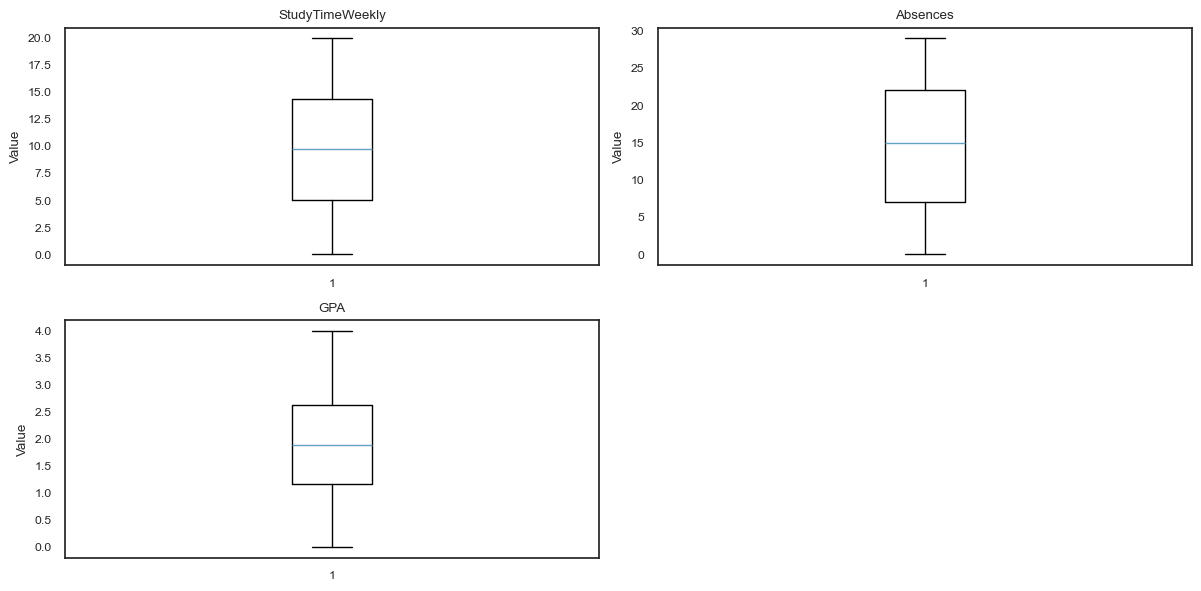

In [31]:
fig, axs = plt.subplots(len(num_col)//2 + len(num_col)%2, 2, figsize=(12, 6))
axs = axs.flatten()

for i,col in enumerate(num_col):
  axs[i].boxplot(data[col])
  axs[i].set_title(col)
  axs[i].set_ylabel('Value')

for j in range(i+1, len(axs)):
  fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [32]:
data.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [33]:
num_col

['StudyTimeWeekly', 'Absences', 'GPA']

In [34]:
cat_col

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass']

# Normalisation

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
cat_col2 =['Sports', 'Volunteering', 'ParentalSupport', 'Music', 'Extracurricular', 'ParentalEducation', 'Age', 'Gender', 'Tutoring', 'Ethnicity']

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[
    ('stdscaler', StandardScaler())
])

#create pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col2),

    ]
)

# Model Building

In [38]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 445.2 kB/s eta 0:05:37
   ---------------------------------------- 0.1/150.0 MB 469.7 kB/s eta 0:05:20
   ---------------------------------------- 0.1/150.0 MB 804.6 kB/s eta 0:03:07
   ---------------------------------------- 0.2/150.0 MB 1.0 MB/s eta 0:02:24
   ---------------------------------------- 0.4/150.0 MB 1.4 MB/s eta 0:01:45
   ---------------------------------------- 0.5/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 0.6/150.0 MB 1.8 MB/s eta 0:01:23
   ---------------------------------------- 0.7/150.0 MB 1.9 MB/s eta 0:01:19
   --------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.5 MB 1.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.5 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 1.8 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 1.9 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'Bagging': BaggingClassifier(),
    'XGboost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LGBM Classifier': LGBMClassifier(),
}

In [42]:
X = data[num_col + cat_col2]  #independent Features
y = data['GradeClass'] #dependent Features

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [43]:
X_train.shape

(1913, 13)

In [44]:
y_test.shape

(479,)

In [45]:
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classfier', AdaBoostClassifier())])
clf1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'GPA']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sports', 'Volunteering',
                                                   'ParentalSupport', 'Music',
                                                   'Extracurricular',
                                                   'ParentalEducation', 'Age',
                                                   'Gender', 'Tutoring',
                                                   'Ethnicity'])])),
                ('classfier', AdaBoostClassifier())])

In [46]:

clf1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'GPA']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sports', 'Volunteering',
                                                   'ParentalSupport', 'Music',
                                                   'Extracurricular',
                                                   'ParentalEducation', 'Age',
                                                   'Gender', 'Tutoring',
                                                   'Ethnicity'])])),
                ('classfier', AdaBoostClassifier())])

In [47]:
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9227557411273486

In [48]:
X_new = pd.DataFrame([[18,1,1,3,13.541, 3,1,3,1,0,0,1,3.310]], columns=num_col + cat_col2)
print(X_new)
# Now predict using the DataFrame.
clf1.predict(X_new)

   StudyTimeWeekly  Absences  GPA  Sports  Volunteering  ParentalSupport  \
0               18         1    1       3        13.541                3   

   Music  Extracurricular  ParentalEducation  Age  Gender  Tutoring  Ethnicity  
0      1                3                  1    0       0         1       3.31  


array([4.])

# Model Evaluation/Training

Logistic Regression evaluation in progress.....


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.7370
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.42      0.49      0.45        49
         2.0       0.59      0.56      0.58        85
         3.0       0.69      0.56      0.62        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.74       479
   macro avg       0.52      0.52      0.51       479
weighted avg       0.70      0.74      0.72       479



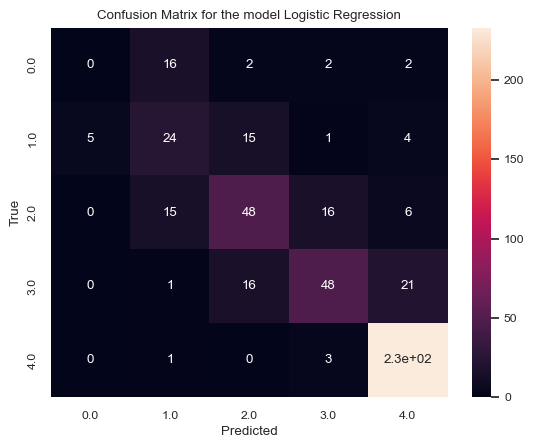

Decision Tree evaluation in progress.....
Accuracy for Decision Tree: 0.8476
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.75      0.55      0.63        22
         1.0       0.67      0.86      0.75        49
         2.0       0.87      0.79      0.83        85
         3.0       0.85      0.83      0.84        86
         4.0       0.90      0.90      0.90       237

    accuracy                           0.85       479
   macro avg       0.81      0.78      0.79       479
weighted avg       0.85      0.85      0.85       479



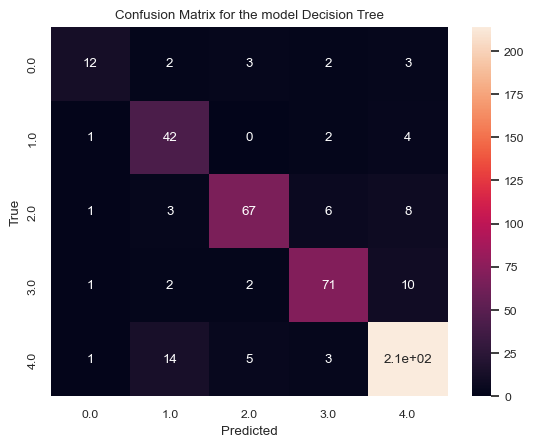

Random Forest evaluation in progress.....
Accuracy for Random Forest: 0.8977
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.23      0.37        22
         1.0       0.75      0.84      0.79        49
         2.0       0.88      0.87      0.88        85
         3.0       0.88      0.88      0.88        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.90       479
   macro avg       0.89      0.76      0.78       479
weighted avg       0.90      0.90      0.89       479



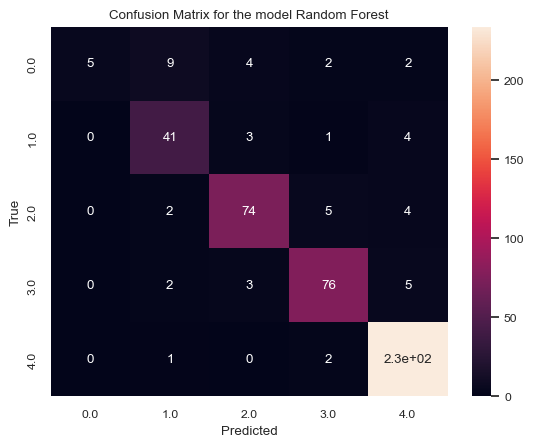

Gradient Boosting evaluation in progress.....
Accuracy for Gradient Boosting: 0.9019
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.77      0.88      0.82        49
         2.0       0.92      0.86      0.89        85
         3.0       0.89      0.85      0.87        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.84      0.85       479
weighted avg       0.90      0.90      0.90       479



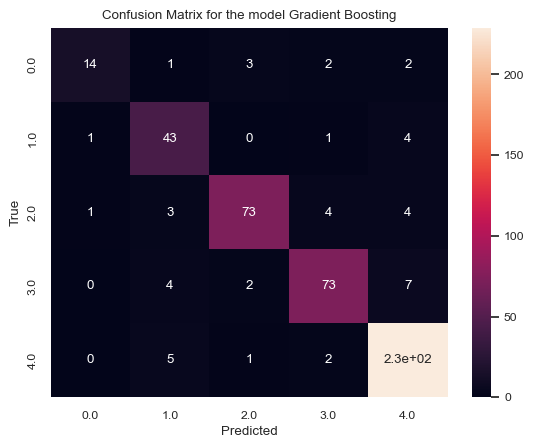

SVC evaluation in progress.....
Accuracy for SVC: 0.8058
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.61      0.67      0.64        49
         2.0       0.77      0.73      0.75        85
         3.0       0.72      0.70      0.71        86
         4.0       0.88      0.96      0.92       237

    accuracy                           0.81       479
   macro avg       0.80      0.64      0.65       479
weighted avg       0.81      0.81      0.79       479



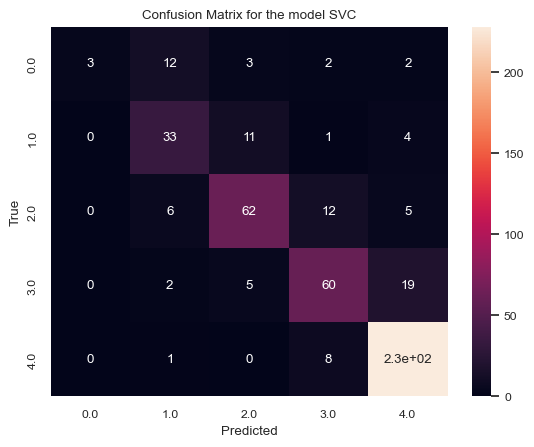

Bagging evaluation in progress.....
Accuracy for Bagging: 0.9061
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65        22
         1.0       0.83      0.88      0.85        49
         2.0       0.93      0.82      0.88        85
         3.0       0.89      0.88      0.89        86
         4.0       0.93      0.98      0.95       237

    accuracy                           0.91       479
   macro avg       0.86      0.83      0.84       479
weighted avg       0.90      0.91      0.90       479



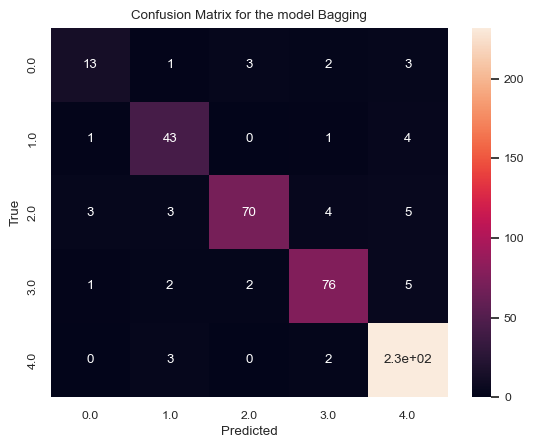

XGboost evaluation in progress.....
Accuracy for XGboost: 0.9081
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68        22
         1.0       0.86      0.86      0.86        49
         2.0       0.93      0.84      0.88        85
         3.0       0.86      0.88      0.87        86
         4.0       0.93      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479



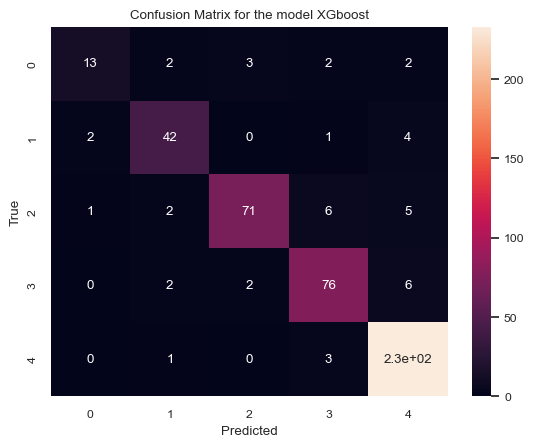

AdaBoost evaluation in progress.....
Accuracy for AdaBoost: 0.9228
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.88      0.88      0.88        49
         2.0       0.94      0.87      0.90        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.85      0.88       479
weighted avg       0.92      0.92      0.92       479



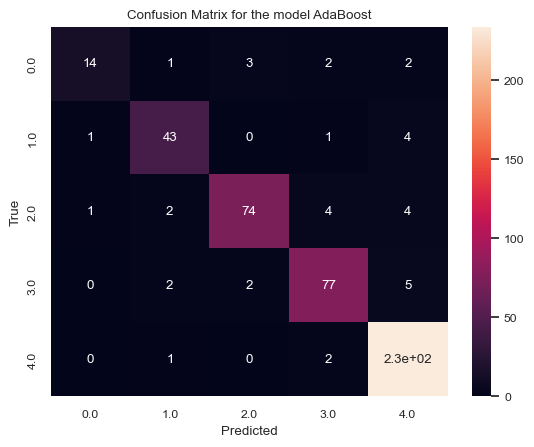

LGBM Classifier evaluation in progress.....
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 33
[LightGBM] [Info] Start training from score -3.113777
[LightGBM] [Info] Start training from score -2.162800
[LightGBM] [Info] Start training from score -1.832843
[LightGBM] [Info] Start training from score -1.763414
[LightGBM] [Info] Start training from score -0.675017


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy for LGBM Classifier: 0.9165
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        22
         1.0       0.88      0.86      0.87        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.89      0.84      0.86       479
weighted avg       0.92      0.92      0.91       479



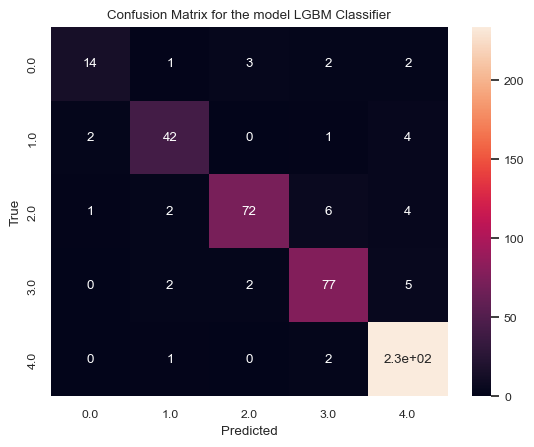

In [49]:
for model_name, model in models.items():
  print(f"{model_name} evaluation in progress.....")

  clf = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', model)
  ])

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for {model_name}: {accuracy:.4f}")
  print("Classification Report: ")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, xticklabels=model.classes_, yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix for the model {model_name}')
  plt.show()